# TimeSeries for CSI Data

In [497]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
import datetime
import seaborn as sns
import os
import IPython
import IPython.display

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [498]:
# Loading dataset
df = pd.read_csv('./CSI_Preprocessing/output/outputs.csv', header=0, parse_dates=True, squeeze=True)
df.head()

,Unnamed: 0,time,0,1,2,3,4,5,6,7,...,54,55,56,57,58,59,60,61,62,63
0,0,1.625554e+09,4343.04985,11583.116204,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,...,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,0.0,2146.567725,4778.184592
1,1,1.625554e+09,4343.04985,11583.116204,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,...,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,0.0,2146.567725,4778.184592
2,2,1.625554e+09,4343.04985,11583.116204,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,...,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,0.0,2146.567725,4778.184592
3,3,1.625554e+09,4343.04985,11583.116204,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982042,...,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,0.0,2146.567725,4778.184592
4,4,1.625554e+09,4343.04985,11583.116204,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,...,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,0.0,2146.567725,4778.184592


In [513]:
# Adding headers
df = pd.read_csv('./CSI_Preprocessing/output/outputs.csv', encoding='utf-8', header=None)
df = df.drop([df.columns[0]], axis='columns')  # remove index column
df = df.drop(0, axis='rows')  # remove column name (first row)
df.reset_index(drop=True, inplace=True)

df.columns -= 1
df.to_csv('./CSI_Preprocessing/output/csi_outputs.csv',

# assign header columns
header = ['Time', 'Subcar_0','Subcar_1', 'Subcar_2', 'Subcar_3', 'Subcar_4', 'Subcar_5', 'Subcar_6',
            'Subcar_7', 'Subcar_8', 'Subcar_9', 'Subcar_10', 'Subcar_11', 'Subcar_12',
            'Subcar_13', 'Subcar_14', 'Subcar_15', 'Subcar_16', 'Subcar_17', 'Subcar_18',
            'Subcar_19', 'Subcar_20', 'Subcar_21', 'Subcar_22', 'Subcar_23', 'Subcar_24',
            'Subcar_25', 'Subcar_26', 'Subcar_27', 'Subcar_28', 'Subcar_29', 'Subcar_30',
            'Subcar_31', 'Subcar_32', 'Subcar_33', 'Subcar_34', 'Subcar_35', 'Subcar_36'
            'Subcar_37', 'Subcar_38', 'Subcar_39', 'Subcar_40', 'Subcar_41', 'Subcar_42',
            'Subcar_43', 'Subcar_44', 'Subcar_45', 'Subcar_46', 'Subcar_47', 'Subcar_48',
            'Subcar_49', 'Subcar_50', 'Subcar_51', 'Subcar_52', 'Subcar_53', 'Subcar_54',
            'Subcar_55', 'Subcar_56', 'Subcar_57', 'Subcar_58', 'Subcar_59', 'Subcar_60',
            'Subcar_61', 'Subcar_62', 'Subcar_63','Subcar_64',
], index=True)

In [514]:
# Loading dataset
df = pd.read_csv('./CSI_Preprocessing/output/csi_outputs.csv', header=0, parse_dates=True, squeeze=True)
df = df.drop([df.columns[0]], axis='columns') 
df.reset_index(drop=True, inplace=True)
df.head()

,Time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61,Subcar_62,Subcar_63,Subcar_64
0,1.625554e+09,4343.04985,11583.116204,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,895.897874,...,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,0.0,2146.567725,4778.184592
1,1.625554e+09,4343.04985,11583.116204,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,879.275270,...,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,0.0,2146.567725,4778.184592
2,1.625554e+09,4343.04985,11583.116204,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,845.568448,...,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,0.0,2146.567725,4778.184592
3,1.625554e+09,4343.04985,11583.116204,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982042,900.568709,...,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,0.0,2146.567725,4778.184592
4,1.625554e+09,4343.04985,11583.116204,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,899.608804,...,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,0.0,2146.567725,4778.184592


In [501]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                1095 non-null   float64
 1   Subcar_0            1095 non-null   float64
 2   Subcar_1            1095 non-null   float64
 3   Subcar_2            1095 non-null   float64
 4   Subcar_3            1095 non-null   float64
 5   Subcar_4            1095 non-null   float64
 6   Subcar_5            1095 non-null   float64
 7   Subcar_6            1095 non-null   float64
 8   Subcar_7            1095 non-null   float64
 9   Subcar_8            1095 non-null   float64
 10  Subcar_9            1095 non-null   float64
 11  Subcar_10           1095 non-null   float64
 12  Subcar_11           1095 non-null   float64
 13  Subcar_12           1095 non-null   float64
 14  Subcar_13           1095 non-null   float64
 15  Subcar_14           1095 non-null   float64
 16  Subcar

In [502]:
# creating a dataframe from the csv file
data_1 = pd.DataFrame(pd.read_csv('./CSI_Preprocessing/output/csi_outputs.csv'))
data_1 = data_1.drop([data_1.columns[0]], axis='columns') 
data_1.reset_index(drop=True, inplace=True)
  
# unit='s' to convert it into epoch time
data_1['Time'] = pd.to_datetime(data_1['Time'])
  
date_time = data_1['Time'].dt.strftime('%S')


# checking our dataframe once again
data_1.head()

  

,Time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61,Subcar_62,Subcar_63,Subcar_64
0,1970-01-01 00:00:01.625554196,4343.04985,11583.116204,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,895.897874,...,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,0.0,2146.567725,4778.184592
1,1970-01-01 00:00:01.625554196,4343.04985,11583.116204,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,879.275270,...,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,0.0,2146.567725,4778.184592
2,1970-01-01 00:00:01.625554196,4343.04985,11583.116204,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,845.568448,...,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,0.0,2146.567725,4778.184592
3,1970-01-01 00:00:01.625554197,4343.04985,11583.116204,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982042,900.568709,...,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,0.0,2146.567725,4778.184592
4,1970-01-01 00:00:01.625554197,4343.04985,11583.116204,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,899.608804,...,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,0.0,2146.567725,4778.184592


In [503]:
data_1.loc[0, 'Time']

Timestamp('1970-01-01 00:00:01.625554196')

In [504]:
# Set the date column as the index of your DataFrame meat
data_1 = data_1.set_index('Time')

# Print the summary statistics of the DataFrame
print(data_1.describe())

          Subcar_0      Subcar_1      Subcar_2     Subcar_3     Subcar_4  \
count  1095.000000   1095.000000   1095.000000  1095.000000  1095.000000   
mean   4343.844617  11550.056540   6565.356199  9437.493860   724.622533   
std      18.588019    488.343124    214.740125   123.308979   541.498303   
min    4343.049850   4343.049850   6556.174571  6556.174571   239.770724   
25%    4343.049850  11583.116204   6556.174571  9442.766173   592.670226   
50%    4343.049850  11583.116204   6556.174571  9442.766173   736.698717   
75%    4343.049850  11583.116204   6556.174571  9442.766173   789.479225   
max    4778.184592  11583.116204  11583.116204  9442.766173  9442.766173   

          Subcar_5     Subcar_6     Subcar_7     Subcar_8     Subcar_9  ...  \
count  1095.000000  1095.000000  1095.000000  1095.000000  1095.000000  ...   
mean    713.728222   740.277101   738.091816   734.995679   716.123039  ...   
std     121.290015   125.017076   123.791419   125.577043   124.478774  ...   

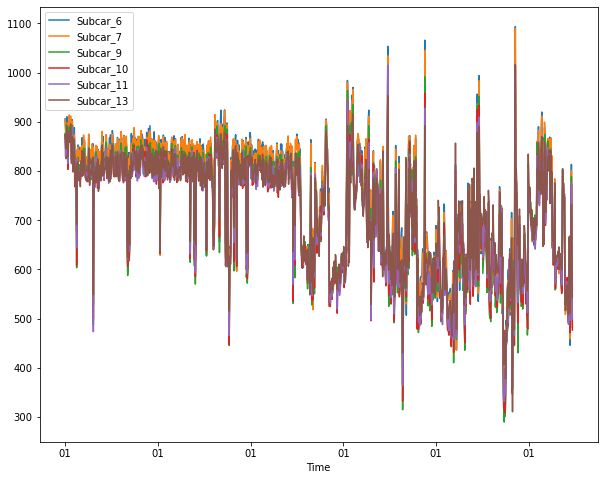

In [505]:
plot_cols = ['Subcar_6', 'Subcar_7','Subcar_9','Subcar_10', 'Subcar_11', 'Subcar_13']
plot_features = data_1[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=False)

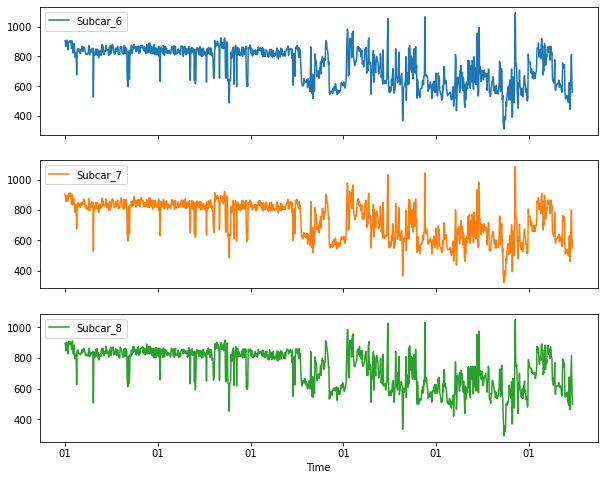

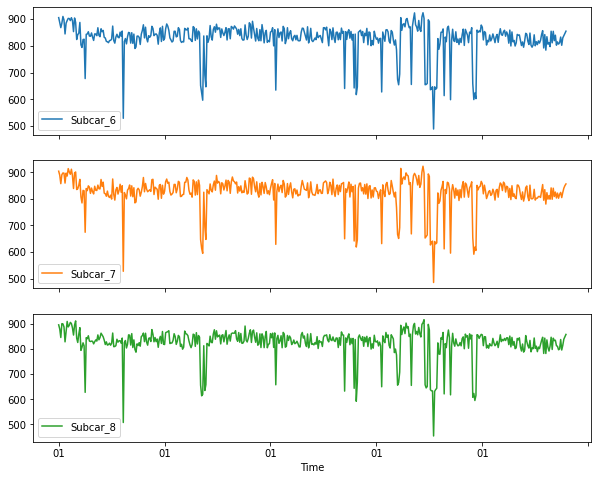

In [506]:
plot_cols = ['Subcar_6', 'Subcar_7', 'Subcar_8']
plot_features = data_1[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = data_1[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [507]:
data_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Subcar_0,1095.0,4343.844617,1.858802e+01,4343.049850,4343.049850,4343.049850,4343.049850,4778.184592
Subcar_1,1095.0,11550.056540,4.883431e+02,4343.049850,11583.116204,11583.116204,11583.116204,11583.116204
Subcar_2,1095.0,6565.356199,2.147401e+02,6556.174571,6556.174571,6556.174571,6556.174571,11583.116204
Subcar_3,1095.0,9437.493860,1.233090e+02,6556.174571,9442.766173,9442.766173,9442.766173,9442.766173
Subcar_4,1095.0,724.622533,5.414983e+02,239.770724,592.670226,736.698717,789.479225,9442.766173
...,...,...,...,...,...,...,...,...
Subcar_60,1095.0,214.708752,1.429559e+02,2.000000,101.294124,175.282629,316.311551,973.151581
Subcar_61,1095.0,226.199879,1.352786e+02,7.211103,124.062454,203.066492,310.642065,943.019088
Subcar_62,1095.0,0.059255,1.960803e+00,0.000000,0.000000,0.000000,0.000000,64.884513
Subcar_63,1095.0,2140.686718,1.122537e+02,0.000000,2146.567725,2146.567725,2146.567725,2146.567725


In [508]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('Subcar%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('Subcar%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('Subcar%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [509]:
data_2 = pd.DataFrame(pd.read_csv('./CSI_Preprocessing/output/csi_outputs.csv', header=0, index_col=0))
values = data_2.values

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   Subcar1(t-1)  Subcar2(t-1)  Subcar3(t-1)  Subcar4(t-1)  Subcar5(t-1)  \
1           0.0           0.0           1.0           0.0           1.0   
2           0.0           0.0           1.0           0.0           1.0   
3           0.0           0.0           1.0           0.0           1.0   
4           0.0           0.0           1.0           0.0           1.0   
5           0.0           0.0           1.0           0.0           1.0   

   Subcar6(t-1)  Subcar7(t-1)  Subcar8(t-1)  Subcar9(t-1)  Subcar17(t-1)  ...  \
1      0.068068      0.769321      0.759545      0.758480       0.855821  ...   
2      0.065265      0.733601      0.734952      0.738693       0.822054  ...   
3      0.064135      0.716845      0.711405      0.697326       0.775959  ...   
4      0.060779      0.705160      0.732726      0.741296       0.869728  ...   
5      0.067837      0.765202      0.765173      0.749681       0.844909  ...   

   Subcar56(t)  Subcar57(t)  Subcar58(t)  Subcar59(t)  Subcar6

In [510]:
# split into train and test sets
values = reframed.values
n_train_hours = 60 * 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print('Training:',train_X.shape)
print('Testing:',test_X.shape)
print('Train_y:', train_y.shape)
print('Test_y:',test_y.shape )

Training: (1094, 1, 122)
Testing: (0, 1, 122)
Train_y: (1094,)
Test_y: (0,)


Epoch 1/50
110/110 - 0s - loss: 0.0212
Epoch 2/50
110/110 - 0s - loss: 0.0128
Epoch 3/50
110/110 - 0s - loss: 0.0066
Epoch 4/50
110/110 - 0s - loss: 0.0083
Epoch 5/50
110/110 - 0s - loss: 0.0046
Epoch 6/50
110/110 - 0s - loss: 0.0060
Epoch 7/50
110/110 - 0s - loss: 0.0046
Epoch 8/50
110/110 - 0s - loss: 0.0032
Epoch 9/50
110/110 - 0s - loss: 0.0037
Epoch 10/50
110/110 - 0s - loss: 0.0027
Epoch 11/50
110/110 - 0s - loss: 0.0019
Epoch 12/50
110/110 - 0s - loss: 0.0035
Epoch 13/50
110/110 - 0s - loss: 0.0021
Epoch 14/50
110/110 - 0s - loss: 0.0022
Epoch 15/50
110/110 - 0s - loss: 0.0015
Epoch 16/50
110/110 - 0s - loss: 0.0010
Epoch 17/50
110/110 - 0s - loss: 9.9165e-04
Epoch 18/50
110/110 - 0s - loss: 0.0011
Epoch 19/50
110/110 - 0s - loss: 0.0013
Epoch 20/50
110/110 - 0s - loss: 0.0011
Epoch 21/50
110/110 - 0s - loss: 9.9982e-04
Epoch 22/50
110/110 - 0s - loss: 7.5411e-04
Epoch 23/50
110/110 - 0s - loss: 5.6253e-04
Epoch 24/50
110/110 - 0s - loss: 6.1530e-04
Epoch 25/50
110/110 - 0s - lo

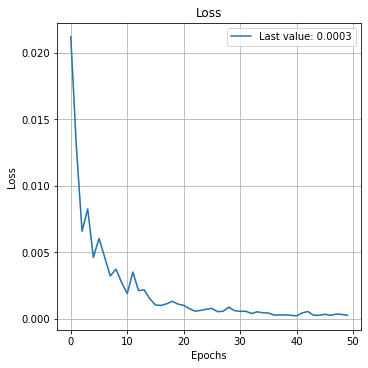

In [511]:
# design network
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history

from plot_keras_history import plot_history
plot_history(history)
plt.show()